In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#Reading csv data and inserting column names
names = "target,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat".split(',')
df = pd.read_csv('data.csv', names = names)

In [3]:
df.head()

,target,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
target                      8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [5]:
#Possible targets: edible or poisonous
df.target.value_counts()

e    4208
p    3916
Name: target, dtype: int64

In [6]:
#Checking missing values
df['stalk-root'].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [7]:
#Geting data with no missing stalk-root values
df_no_missing_values = df[df['stalk-root'] != '?']
len(df_no_missing_values)

5644

In [8]:
df_no_missing_values.head(3)

,target,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m


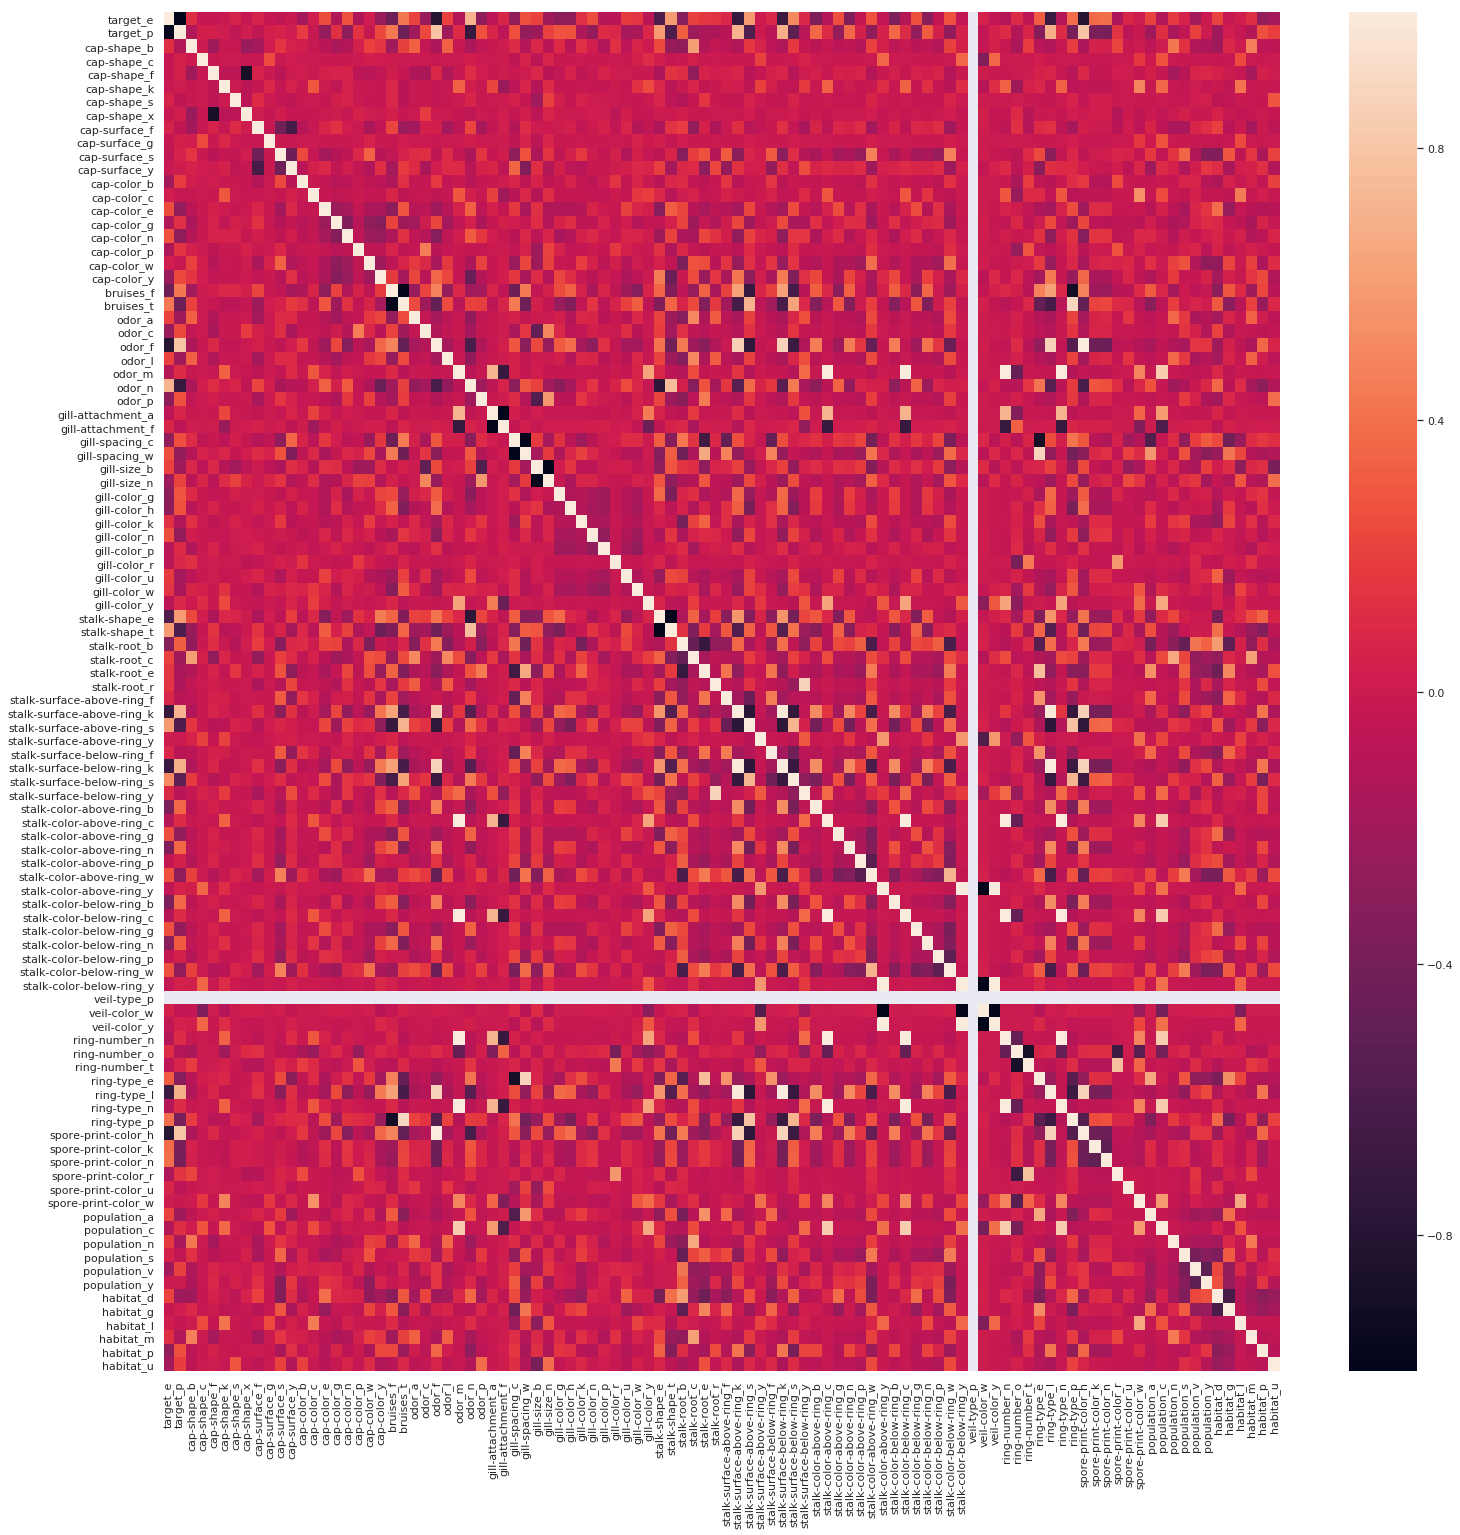

In [9]:
#Plotting heatmap
sns.set()
plt.figure(figsize=[25,25])
columns = ['target','cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']
df_no_missing_values_dummies = pd.get_dummies(df_no_missing_values, columns=columns)
sns.heatmap(df_no_missing_values_dummies.corr())

In [10]:
#Correlations between stalk-root and target
print('stalk-root_r: ',df_no_missing_values_dummies.corr()['target_p']['stalk-root_r'])
print('stalk-root_b: ',df_no_missing_values_dummies.corr()['target_p']['stalk-root_b'])
print('stalk-root_e: ',df_no_missing_values_dummies.corr()['target_p']['stalk-root_e'])
print('stalk-root_c: ',df_no_missing_values_dummies.corr()['target_p']['stalk-root_c'])
print('')

relation_to_target_e = df_no_missing_values_dummies.corr()['target_e']
print(relation_to_target_e)

stalk-root_r:  -0.14753967786618735
stalk-root_b:  0.32049592208595584
stalk-root_e:  -0.1571174171154138
stalk-root_c:  -0.20605486090533767

target_e                    1.000000
target_p                   -1.000000
cap-shape_b                 0.121260
cap-shape_c                -0.033873
cap-shape_f                -0.031649
cap-shape_k                -0.010297
cap-shape_s                 0.059368
cap-shape_x                -0.028534
cap-surface_f               0.060858
cap-surface_g              -0.033873
cap-surface_s              -0.058393
cap-surface_y              -0.008931
cap-color_b                -0.187468
cap-color_c                 0.019935
cap-color_e                 0.253791
cap-color_g                -0.127364
cap-color_n                 0.274571
cap-color_p                -0.144752
cap-color_w                 0.016243
cap-color_y                -0.236200
bruises_f                  -0.435562
bruises_t                   0.435562
odor_a                      0.217137
odor_c

Checking the value of the attribute 'veil-type' it was stated that all the samples was classified as 'p'.

Then, we can drop the 'veil-type' column because it doesn't have any impact in the classification of the mushroom.

In [11]:
df['veil-type'].value_counts()

p    8124
Name: veil-type, dtype: int64

In [23]:
df_cleaned = df.drop('veil-type', axis=1)

In [25]:
df.shape

(8124, 23)

In [26]:
df_cleaned.shape

(8124, 22)

Now we will check the relation between the attributes and the targets in a bar chart.

In [13]:
sorted_relation_to_target_e = relation_to_target_e.sort_values(ascending=True)
sorted_relation_to_target_e

target_p                     -1.000000
odor_f                       -0.794472
spore-print-color_h          -0.794472
stalk-surface-above-ring_k   -0.706930
stalk-surface-below-ring_k   -0.694419
ring-type_l                  -0.694419
stalk-shape_e                -0.592446
bruises_f                    -0.435562
stalk-color-above-ring_b     -0.366188
stalk-color-below-ring_b     -0.366188
stalk-color-above-ring_n     -0.351897
stalk-root_b                 -0.320496
stalk-color-below-ring_n     -0.312376
gill-color_g                 -0.288324
odor_p                       -0.277249
gill-color_h                 -0.276505
gill-spacing_c               -0.264160
habitat_p                    -0.260632
odor_c                       -0.238691
cap-color_y                  -0.236200
gill-size_n                  -0.215289
population_v                 -0.197229
habitat_u                    -0.194122
cap-color_b                  -0.187468
cap-color_p                  -0.144752
spore-print-color_r      

In [14]:
barchart_x = sorted_relation_to_target_e.keys()

In [15]:
barchart_y = sorted_relation_to_target_e.values

<BarContainer object of 100 artists>

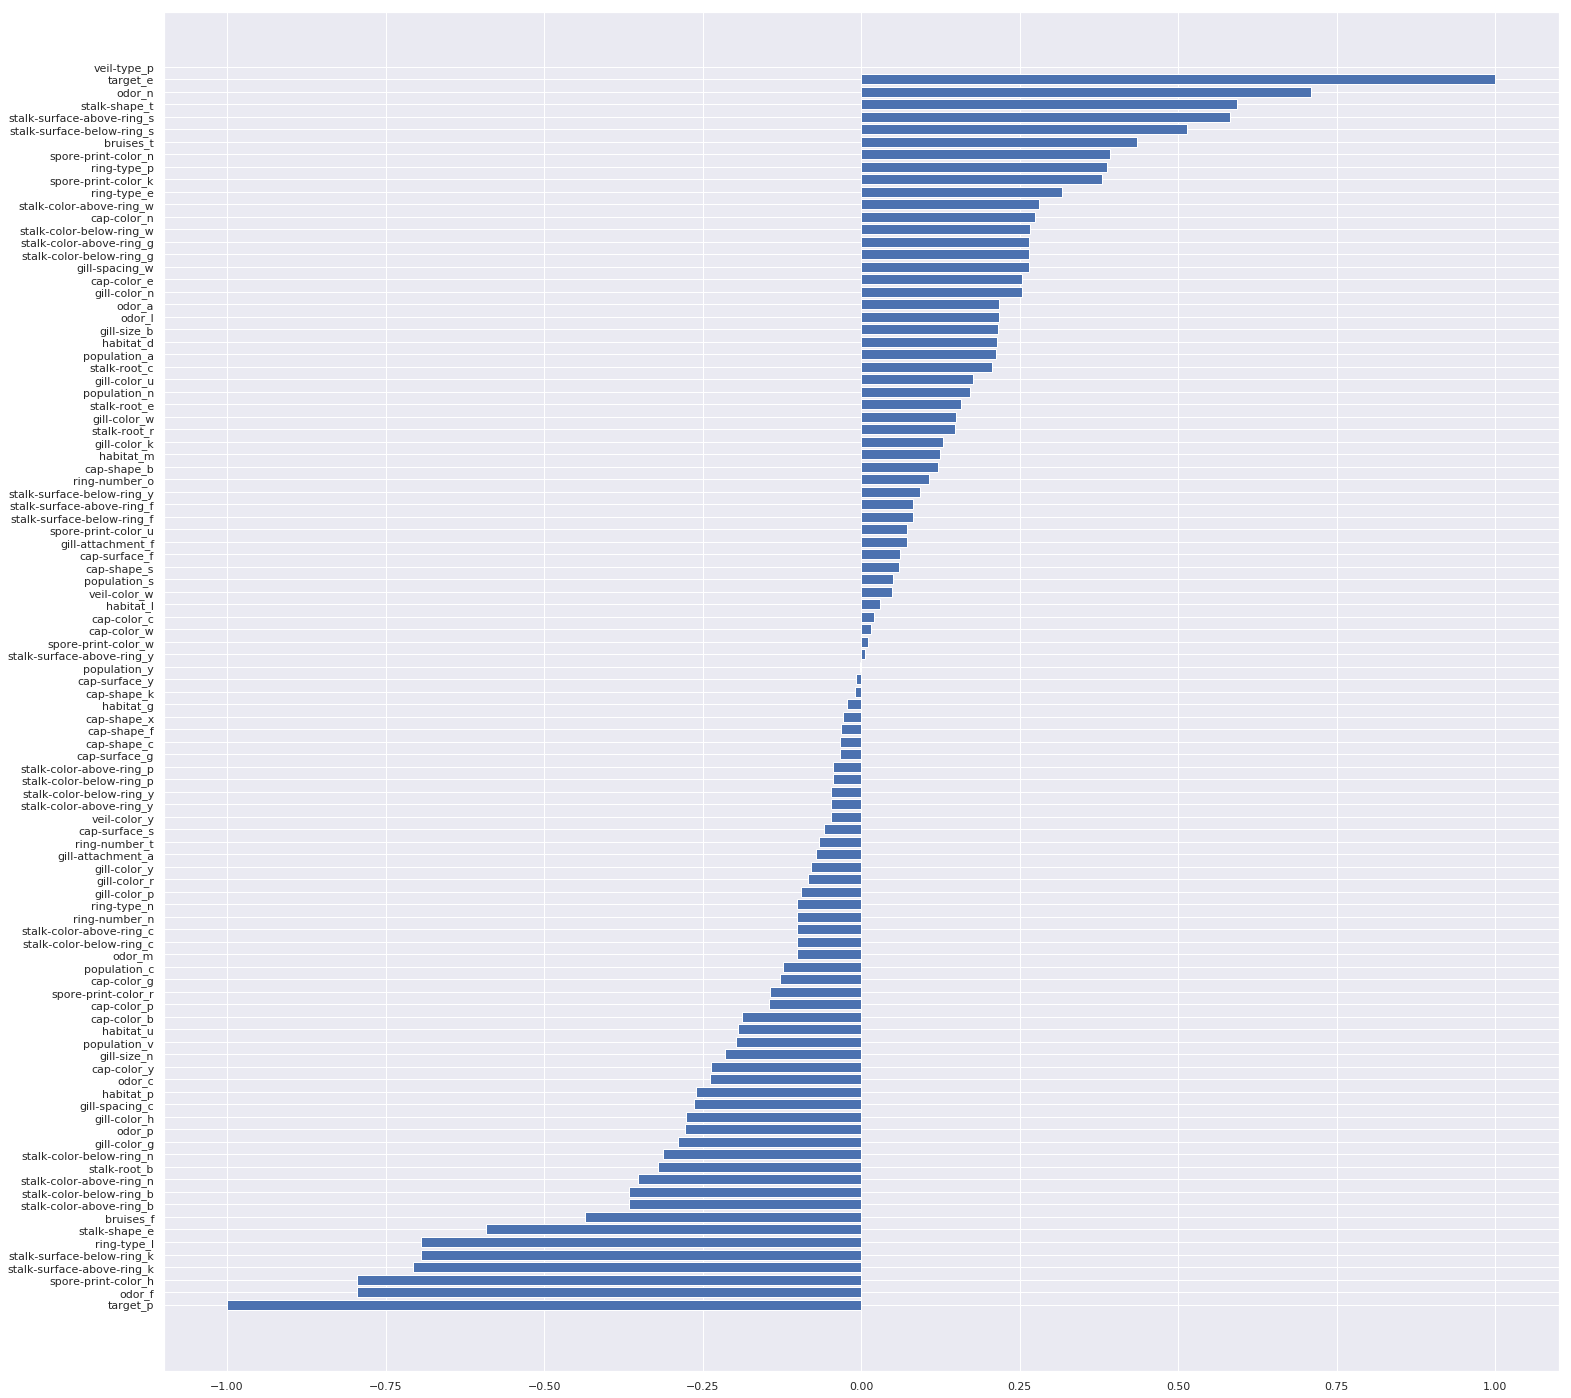

In [16]:
plt.figure(figsize=[25,25])
plt.barh(barchart_x, barchart_y)

As we can see as result of correlations between stalk-roots and target

stalk-root_r:  -0.147539677866  
stalk-root_b:  0.320495922086  
stalk-root_e:  -0.157117417115  
stalk-root_c:  -0.206054860905  

This column whose has many missing data has no strong correlation with the target  
So, we will drop the stalk-roots column to avoid missing data

In [17]:
df_cleaned = df.drop('stalk-root', axis=1)

In [18]:
df.shape

(8124, 23)

In [19]:
df_cleaned.shape

(8124, 22)

In [20]:
#Using pandas get_dummies to discrete each letter to a column
columns = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']
df_dummies = pd.get_dummies(df_cleaned, columns=columns, drop_first=True)

In [21]:
df_dummies

,target,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,p,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,e,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,e,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,p,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,e,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
5,e,0,0,0,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
6,e,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
7,e,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
8,p,0,0,0,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
9,e,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [22]:
df_dummies.to_csv('cleaned_data.csv', sep=',')